In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("/Users/navamongkoltongta/.kaggle/HeartAttack/heart.csv")

In [3]:
data

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# sns.pairplot(data, hue="output")

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
# data['age_group'] = pd.qcut(data['age'], 5)

In [8]:
# data.head()

In [9]:
# data.groupby('age_group')['output'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

In [10]:
input = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
# input = data[['cp','thalachh','slp','restecg']]
target = data[['output']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3, random_state=42)

In [12]:
model = RandomForestClassifier().fit(X_train,y_train.values.ravel())

In [13]:
train = model.score(X_train,y_train)
test = model.score(X_test,y_test)
print("Model Train : ", train)
print("Model Test : ", test)

Model Train :  1.0
Model Test :  0.8021978021978022


In [14]:
model.feature_importances_

array([0.08643147, 0.02956549, 0.10875805, 0.06605589, 0.07397441,
       0.01083986, 0.01738093, 0.10012427, 0.08070762, 0.11813961,
       0.04388049, 0.16022331, 0.10391859])

In [15]:
pred = model.predict(X_test)

In [16]:
#Predict Accuracy
acc = accuracy_score(y_test, pred)
error = np.sqrt(mean_squared_error(y_test, pred))
overfitting_by = model.score(X_train, y_train)*100 - model.score(X_test, y_test)*100
print("Accuracy :",acc)
print("Error :",error)
print("Overfitting :", overfitting_by)

Accuracy : 0.8021978021978022
Error : 0.4447495899966607
Overfitting : 19.78021978021978


In [17]:
cm = confusion_matrix(y_test , pred)

<AxesSubplot:>

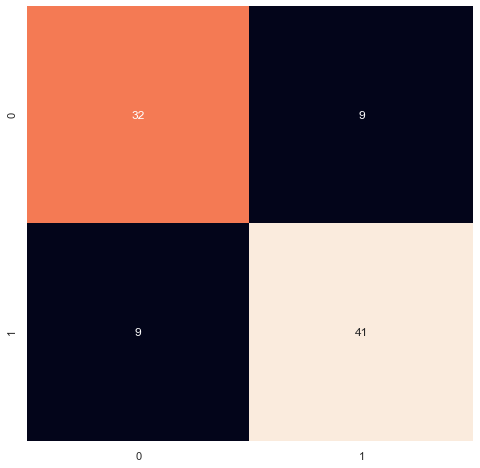

In [18]:
sns.heatmap(cm, annot = True , cbar=False)

## Try to use GridSearchCV

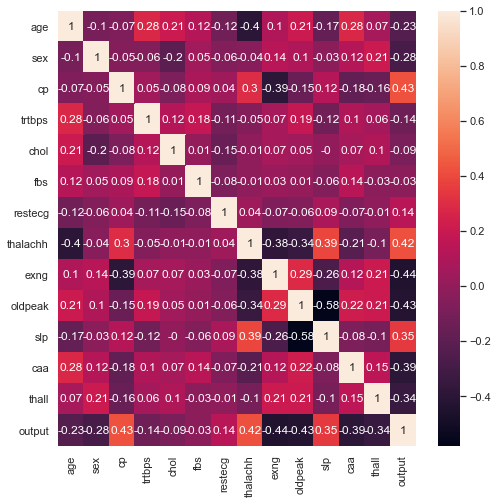

In [19]:
corr = data.corr()
sns.heatmap(round(corr,2), annot=True)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3, random_state=42, shuffle=True)

In [21]:
model = RandomForestClassifier()
params = {'n_estimators': [50,100,150],
               'max_features': ['auto','sqrt','log2'],
               'max_depth': [1,2,3,4,5,6],
         }
grid = GridSearchCV(estimator=model, param_grid=params, cv=3)

In [22]:
grid.fit(input,target.values.ravel())
grid.best_params_

{'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}

In [23]:
print("Train set",grid.score(X_train, y_train))
print("Test set",grid.score(X_test, y_test))

Train set 0.8443396226415094
Test set 0.8901098901098901


In [24]:
pred = grid.predict(X_test)

In [25]:
cm = confusion_matrix(y_test , pred)

<AxesSubplot:>

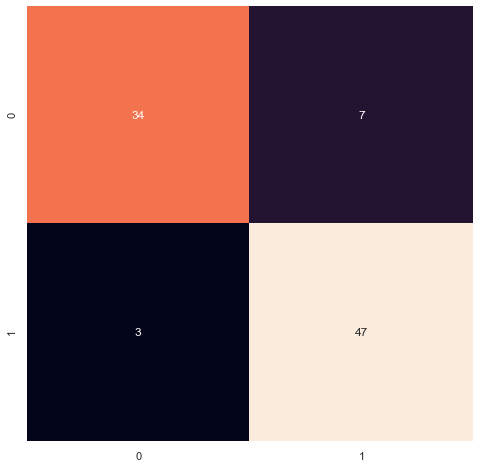

In [26]:
sns.heatmap(cm, annot = True , cbar=False)

In [27]:
#Predict Accuracy
acc = accuracy_score(y_test, pred)
error = np.sqrt(mean_squared_error(y_test, pred))
overfitting_by = grid.score(X_train, y_train)*100 - grid.score(X_test, y_test)*100
print("Accuracy :",acc)
print("Error :",error)
print("Overfitting :", overfitting_by)

Accuracy : 0.8901098901098901
Error : 0.33149677206589795
Overfitting : -4.577026746838072


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.87      0.94      0.90        50

    accuracy                           0.89        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.89      0.89      0.89        91

